### This notebook is a modification of a <a href="https://www.datacamp.com">DataCamp</a> project on word frequency in Moby Dick
<p>The idea is to scrape a text from URL, tokenize it, remove stop words and output the n most frequent words in the text.</p>

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests, nltk
from bs4 import BeautifulSoup

In [2]:
# English stop words from nltk
stop_words = nltk.corpus.stopwords.words("english")

In [3]:
url_moby_dick = "https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm"

In [23]:
def word_frequency(url, sw, number):
    """
    Scrapes url with text, tokenizes it, removes stop words and returns specified number 
    of most common words in a text
    
    Input:
    url (string) - string containing url address of a text
    sw - stopwords from nltk corpus for English language
    number - number of most common words to return
    
    Return:
    
    most_common_words (list) - specified number of most common words in a text
    """
    
    # Getting the text HTML 
    r = requests.get(url)

    # Setting the correct text encoding of the HTML page
    r.encoding = 'utf-8'

    # Extracting the HTML from the request object
    html = r.text

    # Creating a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "lxml")

    # Getting the text out of the soup
    text = soup.get_text()

    # Creating a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

    # Tokenizing the text
    tokens = tokenizer.tokenize(text)

    # Looping through the tokens and make them lower case
    words = [word.lower() for word in tokens]

    words_ns = [word for word in words
                 if word not in sw]

    # Creating the word frequency distribution
    freqdist = nltk.FreqDist(words_ns)

    # Most common word in the text
    most_common_words = freqdist.most_common(number)
    
    %matplotlib inline

    # Plotting the word frequency distribution
    freqdist.plot(15)

    return most_common_words
    

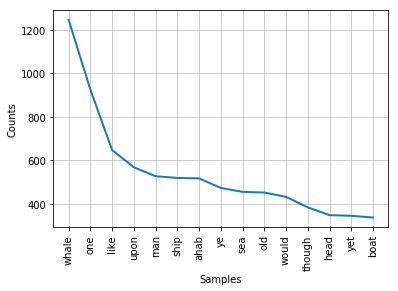

[('whale', 1246), ('one', 925), ('like', 647)]

In [24]:
word_frequency(url_moby_dick, stop_words, 3)

Use another URL-addresses

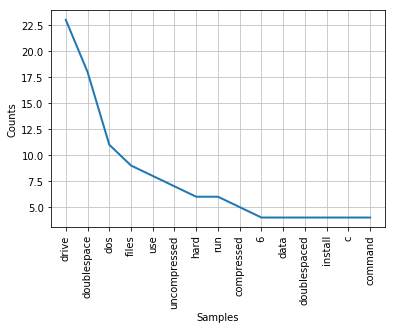

[('drive', 23), ('doublespace', 18), ('dos', 11)]

In [25]:
word_frequency("http://www.textfiles.com/computers/caution.txt", stop_words, 3)

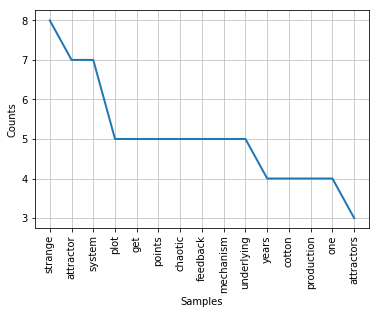

[('strange', 8), ('attractor', 7), ('system', 7)]

In [26]:
word_frequency("http://www.textfiles.com/computers/chaos.txt", stop_words, 3)

# Original notebook:

## 1. Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 15%" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>What are the most frequent words in Herman Melville's novel, Moby Dick, and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>). </p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>

<p>This project is a modification of a <a href="https://www.datacamp.com">DataCamp</a> project on word frequency in Moby Dick.</p>

In [6]:
# Importing requests, BeautifulSoup and nltk
import requests, nltk
from bs4 import BeautifulSoup

## 2. Request Moby Dick
<p>Scrape text from Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .</p>

In [7]:
# Getting the Moby Dick HTML 
r = requests.get("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 200 characters in html
html[:200]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/'

## 3. Get the text from the HTML
<p>Using BeautifulSoup package.</p>

In [8]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "lxml")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
text[32000:34000]

'which the beech tree\r\n        extended its branches.” —Darwin’s Voyage of a Naturalist.\r\n      \n\r\n        “‘Stern all!’ exclaimed the mate, as upon turning his head, he saw the\r\n        distended jaws of a large Sperm Whale close to the head of the boat,\r\n        threatening it with instant destruction;—‘Stern all, for your\r\n        lives!’” —Wharton the Whale Killer.\r\n      \n\r\n        “So be cheery, my lads, let your hearts never fail, While the bold\r\n        harpooneer is striking the whale!” —Nantucket Song.\r\n      \n\r\n     “Oh, the rare old Whale, mid storm and gale\r\n     In his ocean home will be\r\n     A giant in might, where might is right,\r\n     And King of the boundless sea.”\r\n      —Whale Song.\r\n\n\n\n\n\n \n\n\n\n\n\r\n      CHAPTER 1. Loomings.\r\n    \n\r\n      Call me Ishmael. Some years ago—never mind how long precisely—having\r\n      little or no money in my purse, and nothing particular to interest me on\r\n      shore, I thought I w

## 4. Extract the words
<p>We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

In [9]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

## 5. Make the words lowercase

In [10]:
# Looping through the tokens and make them lower case
words = [word.lower() for word in tokens]
    
# Printing out the first 8 words / tokens 
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

## 6. Load in stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use.</p>

In [11]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words("english")

# Printing out the first eight stop words
sw[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

## 7. Remove stop words in Moby Dick
<p>We now want to create a new list with all <code>words</code> in Moby Dick, except those that are stop words (that is, those words listed in <code>sw</code>). One way to get this list is to loop over all elements of <code>words</code> and add each word to a new list if they are <em>not</em> in <code>sw</code>.</p>

In [12]:
words_ns = [word for word in words
             if word not in sw]
words_ns[:8]

['moby', 'dick', 'whale', 'herman', 'melville', 'body', 'background', 'faebd0']

## 8. We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>
</blockquote>
<p>Create a word frequency distribution plot using <code>nltk</code>. </p>

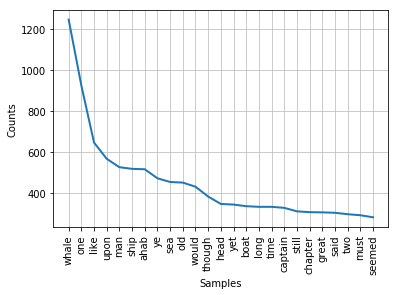

In [13]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## 9. The most common word
<p>Nice! The frequency distribution plot above is the answer to our question. </p>

In [14]:
# What's the most common word in Moby Dick?
most_common_word = freqdist.most_common(1)

In [15]:
most_common_word

[('whale', 1246)]